In [24]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
#Standardization Function
def standardize(arr):
    return[(value - arr.mean())/arr.std() for value in arr]

In [26]:
#importing and extracting from csv file. Creating np arrays and other global variable
data = pd.read_csv("https://raw.githubusercontent.com/navidharni/Machine-Learning/main/Dataset/student_marks.csv")
X = data['Midterm mark']
y = data['Final mark']

X_val = np.array(standardize(X))
y_val = np.array(standardize(y))


In [27]:
#Error/Cost Function
def error(m,b):
    err = 0
    for index in range(len(X_val)):
      X_i = X_val[index]
      y_i = y_val[index]
      err += (y_i-(m*X_i + b))**2
    return err/len(X_val)

In [28]:
#Gradient Partial Derivative w/ respect to b
def gpd_b(m,b):
    summation=0
    for index in range(len(X_val)):
        X_i = X_val[index]
        y_i = y_val[index]
        summation += -1*(y_i-(m*X_i + b))
    return (2*summation)/len(X_val)

In [29]:
#Gradient Partial Derivative w/ respect to m
def gpd_m(m,b):
    summation = 0
    for index in range(len(X_val)):
        X_i = X_val[index]
        y_i = y_val[index]
        summation += -1*X_i*(y_i-(m*X_i + b))
    return 2*summation/len(X_val)

In [30]:
#Update m
def update_m(m,b,alpha):
    return m - alpha*gpd_m(m,b)

In [31]:
#Update b
def update_b(m,b,alpha):
    return b-alpha*gpd_b(m,b)

In [32]:
# Default plot setup
def data_plot(m, b, title,bool):
    #ploting Data Values: Midterm Marks on X-axis, Final Mark on Y-axis
    plt.plot(X_val, [m * val + b for  val in X_val] , label = "Linear Regression", color ='r')
    if bool:
      plt.scatter(X_val , y_val, label = "Standardized Data Values")
      plt.xlabel('Standardized Midterm mark')
      plt.ylabel('Standardized Final mark')
    else:
      plt.scatter(X_val , y_val, label = "Data Values")
      plt.xlabel('Midterm mark')
      plt.ylabel('Final mark')

    plt.title(title)
    plt.legend()
    plt.show()

In [33]:
# Plot for reitrated m and b
def reitr_plot(m,b,alpha,iter,bool):
  err =[]
  for i in range(iter):
    m_old = m
    b_old = b
    m = update_m(m_old,b_old,alpha)
    b = update_b(m_old,b_old,alpha)
    err.append(error(m,b))
  if bool:
    data_plot(m,b,f'After updating b and m {iter} times; m = {round(m,2)}, b = {b:.3e}',True)
  else:
    data_plot(m,b,f'After updating b and m {iter} times; m = {round(m,2)}, b = {b:.3e}',False)
  error_plot(err,f'Error for {iter} iterations')

In [34]:
# Default error plots setup
def error_plot(err, title):
    plt.plot(range(1,len(err)+1),err,color ='y')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()

In [35]:
# Part 1. Calculating mean and std deviation for X and y
X_mean = X.mean(); y_mean = y.mean()
print(f'Mean of Midterm: {X_mean} and Mean of Final: {y_mean}')
X_std = X.std(); y_std = y.std()
print(f'Std Deviation of Midterm: {X_std} and Std Deviation of Final: {y_std}')

Mean of Midterm: 48.959 and Mean of Final: 72.735
Std Deviation of Midterm: 9.746494785617061 and Std Deviation of Final: 16.658248631676365


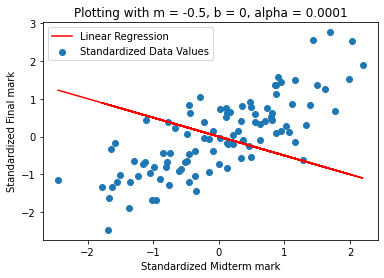

In [36]:
# Plotting with inital m and b
m = -0.5 ; b = 0 ; alpha = 0.0001
data_plot(m,b,f'Plotting with m = {m}, b = {b}, alpha = {alpha}',True)

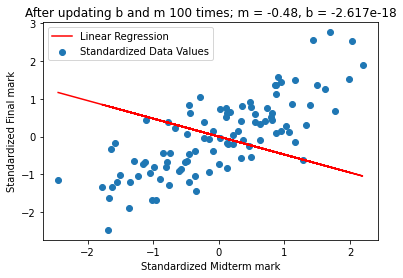

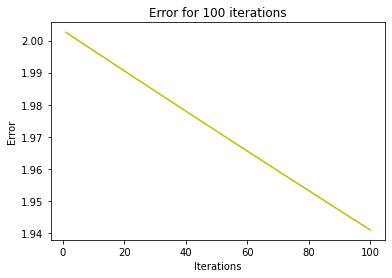

In [37]:
#Plotting with m and b values updated 100 times
reitr_plot(m,b,alpha,100,True)

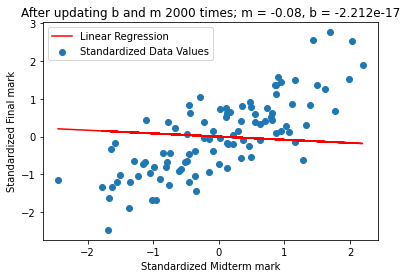

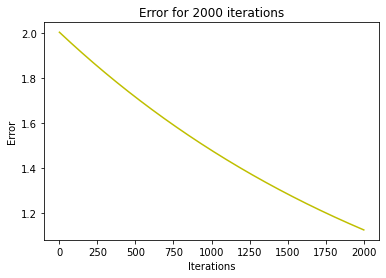

In [38]:
#Plotting with m and b values updated 2000 times
reitr_plot(m,b,alpha,2000,True)

In [ ]:
#Plotting with m and b values updated 10,000 times
reitr_plot(m,b,alpha,10000,True)

In [ ]:
#Model generated by Sckit-Learn

reg = LinearRegression()
reg.fit(np.array(X_val).reshape(-1,1),np.array(y_val).reshape(-1,1))
data_plot(reg.coef_[0],reg.intercept_,f'Model generated with sklearn; m ={reg.coef_[0]}, b={reg.intercept_}',True)

In [ ]:
#Discussion Question: Effect of Standardization
#Plots without standardization
X_val = data['Midterm mark']
y_val = data['Final mark']

data_plot(m,b,'Initial Plot',False)

In [ ]:
#Plots without standardization ,iteration =100
reitr_plot(m,b,alpha,100,False)

In [ ]:
#Plots without standardization ,iteration =2000
reitr_plot(m,b,alpha,2000,False)

In [ ]:
#Discussion Question: effect of alpha

X_val = np.array(standardize(X))
y_val = np.array(standardize(y))
alpha =0.1

reitr_plot(m,b,alpha,100,True)